In [100]:
""" 
The Monty Hall problem
https://en.wikipedia.org/wiki/Monty_Hall_problem 

See montyhallproblem.py
"""
import random
from random import randint
from enum import Enum
import matplotlib.pyplot as plt


In [101]:
class Strategy(Enum):
    CHANGE = 1
    KEEP = 0
    RANDOM = 2

In [113]:
def play_game(strategy):
    
    doors = [0, 1, 2]

    good_door = randint(0,2)
    
    # Player choice
    premier_choice = randint(0,2)

    # Deleting the door selected by player
    doors.remove(premier_choice)

    # The presenter eliminates a door based on player choice
    if premier_choice == good_door:
        doors.remove(doors[randint(0,1)])
    else:
        doors = [good_door]

    second_choice = 0
    
    # The second choice depends on strategy
    if strategy == Strategy.CHANGE:
        second_choice = doors[0]
    elif strategy == Strategy.KEEP:
        second_choice = premier_choice
    else:
        # Random strategy
        list = [premier_choice, doors[0]]
        second_choice = random.choice(list)

    return second_choice == good_door

In [103]:
def play(strategy, nb_tours):
    return [ 1 if play_game(strategy) else 0 for i in range(nb_tours)]

In [104]:
sum(play(Strategy.CHANGE, 1000))

672

In [112]:
sum(play(Strategy.KEEP, 1000))

359

In [114]:
sum(play(Strategy.RANDOM, 1000))

517

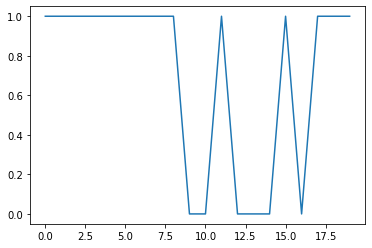

In [106]:
plt.plot(play(Strategy.CHANGE, 20))

<BarContainer object of 3 artists>

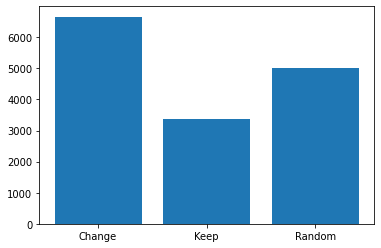

In [116]:
plt.bar([1, 2, 3], [sum(play(Strategy.CHANGE, 10000)), sum(play(Strategy.KEEP, 10000)), sum(play(Strategy.RANDOM, 10000))], tick_label=["Change", "Keep", "Random"])

In [ ]:
plt.scatter(range(10000), play(Strategy.CHANGE, 10000))

In [ ]:
gains_change = []
gains_keep = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for turns in samples:
    gains_change.append(play(Strategy.CHANGE, turns))
    gains_keep.append(play(Strategy.KEEP, turns))

In [ ]:
plt.figure()
plt.scatter(samples, [sum(x) for x in gains_change])
plt.scatter(samples, [sum(x) for x in gains_keep])

In [ ]:
plt.bar([1,2], [sum(play(Strategy.CHANGE, 1000))/1000, sum(play(Strategy.KEEP, 1000))/1000], tick_label=["Change","Keep"])